1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y abin_centersis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of bin_centers, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * bin_centers.std() * bin_centers.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


Integral of the total gaussian: 199.99999999986122
total number of counts: 200.0


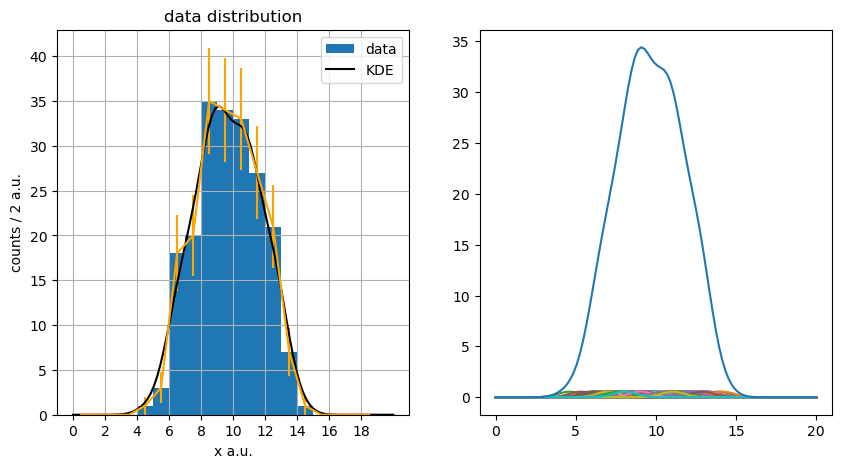

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sp

N=200
mu = 10
sigma = 2

x = np.random.normal(mu, sigma,N)
fig, ax = plt.subplots(1,2,figsize=(10,5))
hist = ax[0].hist(x,bins = np.arange(0,20,1), label="data")

counts = hist[0]
bin_edges = hist[1]

bin_w = bin_edges[1]-bin_edges[0]
bin_centers = bin_edges[:-1]+bin_w/2
bin_err = np.sqrt(counts)

ax[0].errorbar(bin_centers,counts,bin_err, color="orange")

sigma = 1.06 * np.std(x)*(len(x)**-0.2)

t = np.linspace(0,20,100)

gaussians = np.array([sp.stats.norm.pdf(t,loc=c,scale=sigma) for c in x])

total_g = np.sum(gaussians,axis = 0)
for g in gaussians:
    ax[1].plot(t,g)

ax[1].plot(t,total_g)

total_g_integral = sp.integrate.trapz(total_g,t)
print("Integral of the total gaussian:",total_g_integral)
print("total number of counts:", np.sum(counts))

# the integral of total_g is the total number events, since each of the is a gaussin with integral 1
# in any case if we want to make an explicit normalization you should write the following

total_g = total_g * np.sum(counts)/total_g_integral
ax[0].plot(t,total_g,color="black",label="KDE")



ax[0].set_xticks(np.arange(0,20,2))
ax[0].set_xlabel("x a.u.")
ax[0].set_ylabel("counts / {} a.u.".format(2))
ax[0].set_title("data distribution")
ax[0].grid(True)
ax[0].legend()


2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

--2024-01-19 13:41:32--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6022:18::a27d:4212, 162.125.67.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6022:18::a27d:4212|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png [following]
--2024-01-19 13:41:32--  https://www.dropbox.com/s/raw/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc9e859be5d9596edb26ac26cfb7.dl.dropboxusercontent.com/cd/0/inline/CLpiDOO9CwIgISj682eIOfVp0ATIWzSBN3RzsEyTXzKGdDsFXYdaESSIBx_M2GTPXYJc7ArXU3QTs06VlpEYI8T24UMeInPCuLukvJRcZm9vpY9E5bsJVK9wotPJO7KCkfw/file# [following]
--2024-01-19 13:41:32--  https://uc9e859be5d9596edb26ac26cfb7.dl.dropboxusercontent.com/

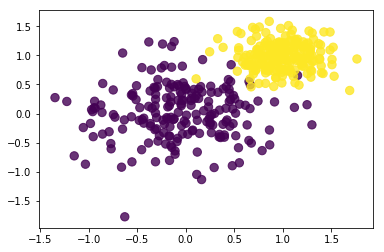

In [2]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

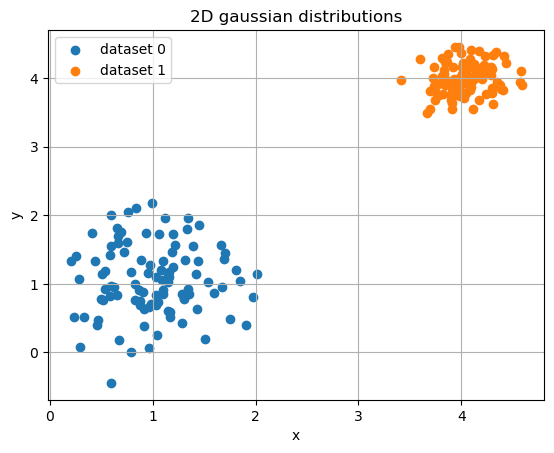

In [30]:
def D2_gauss_gen(means,sigmas,N):
    if len(means) != len(sigmas):
        print("error, different dimentions in means, sigmas arrays")

    datasets =[]
    for m,s in zip(means,sigmas):
        set = np.random.normal(m,s,size=(2,N))
        datasets.append(set)
    return np.array(datasets)

datasets = D2_gauss_gen([1,4],[0.5,0.2],100)

fig,ax = plt.subplots(1,1)
for i in range(datasets.shape[0]):
    ax.scatter(datasets[i][0],datasets[i][1],label="dataset {}".format(i))
    
ax.grid(True)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_title("2D gaussian distributions")
ax.legend()

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

In [96]:
# downloading the data
!wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy

--2024-01-20 16:53:52--  https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
Loaded CA certificate '/etc/ssl/certs/ca-certificates.crt'
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: /s/raw/hgnvyj9abatk8g6/residuals_261.npy [following]
--2024-01-20 16:53:52--  https://www.dropbox.com/s/raw/hgnvyj9abatk8g6/residuals_261.npy
Reusing existing connection to [www.dropbox.com]:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucd03f9def278619609122f1078a.dl.dropboxusercontent.com/cd/0/inline/CLs31ls-0r0leSgnswSW_i_gganBHKAW8uIb7QQWg1CbjnTGgctLTZmp3W7hpn2B2lr4cbM7EohyPyevRN4kXzzCLZZm3Fd_oLk3masybYT3tK6k9ZSLWPojVG4gmXrhTp4/file# [following]
--2024-01-20 16:53:53--  https://ucd03f9def278619609122f1078a.dl.dropboxusercontent.com/cd/0/inline/CLs31ls-0r0leSgnswSW_i_gganBHK

/home/nicolo/anaconda3/envs/python-lab/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/home/nicolo/anaconda3/envs/python-lab/lib/python3.12/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


fit results:
slope = 0.0032597701220305835 
intercept = -0.15432816763069473


<ErrorbarContainer object of 3 artists>

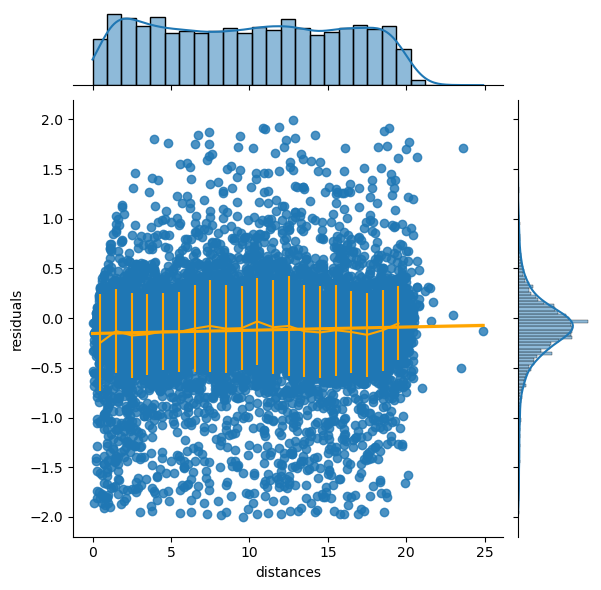

In [26]:
import pandas as pd
import seaborn as sb
df = pd.DataFrame(np.load("./residuals_261.npy",allow_pickle=True).item())
df= df[np.abs(df["residuals"]) < 2]

fit = sp.stats.linregress(df["distances"],df["residuals"])
j_plot=sb.jointplot(df,x="distances",y="residuals",kind="reg",line_kws ={"color":"orange"})
print("fit results:\nslope =", fit.slope,"\nintercept =",fit.intercept)

bin_center = np.arange(0.5,20.5,1)
bin_w = bin_center[1]-bin_center[0]
y_mean = [ df[ np.abs(df["distances"]-b) < bin_w/2 ]["residuals"].mean()  for b in bin_center]
y_err = [ df[ np.abs(df["distances"]-b) < bin_w/2 ]["residuals"].std()  for b in bin_center]
j_plot.ax_joint.errorbar(bin_center,y_mean,y_err,color="orange")
